# <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black;"><strong>Module importations</strong></span>

In [1]:
from MyModule import *

In [2]:
Saving_boolean = True


foo = os.path.join(r'C:\Users\ayazici\Documents\Analyses\Vestibular_experiments', "path.json")

if os.path.exists(foo):
    selected_path = jd.load(foo)
else:
    def selection_change():
        global selected_path
        selected_path = selected_option.get()
        print(selected_path)

    root = tk.Tk()
    root.title("Select one animal for phototagging analysis")

    selected_option = tk.StringVar()

    animal_list = [
        r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal20_a40d1s1_ephys\20a40d1s1_200426_142125',
        r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal20_a41d1s1_ephys_BAD\20a41d1s1_200426_171205',
        r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal20_a49d1s1_ephys\20a49d1s1_200528_093956',
        r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal20_a50d1s1_ephys\20a50d1s1_200530_095333',
        r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a15d1s1_ephys\21a15d1s1_210326_163524',
        r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a17d1s1_ephys\21a17d1s1_210330_130118',
        r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a18d1s1_ephys\21a18d1s1_210401_111241',
        r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a19d1s1_ephys\21a19d1s1_210403_130057',
        r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a21d1s1_ephys\21a21d1s1_210408_155731',
        r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a45d1s2_ephys_BAD\21a45d1s2_210526_120819',
        r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a51d1s1_ephys\21a51d1s1_210602_110516',
        r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a53d1s1_ephys\21a53d1s1_210604_150840'
        ]

    for i, animal in enumerate(animal_list):
        radio_button = tk.Radiobutton(root, text=animal, variable=selected_option, value=animal, command=selection_change)
        radio_button.pack(anchor='w')

    root.mainloop()

P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a53d1s1_ephys\21a53d1s1_210604_150840


In [3]:
## qt for popup window (savable as pdf, svg...), inline for inline plot, notebook for interactive plot, widget for interactive plot
#%matplotlib widget 
#plt.ioff()
## plt.rcdefaults()

# <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>FUNCTIONS</strong></span>

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>plots(row_number, col_number, width, height, *args, suptitle=None,**kwargs)</strong></span>

In [4]:
def plots(*plot_commands, ncols=None, suptitle=None, supxlabel=None, supylabel=None, size=(9, 5), show=True, save=False, filename=None):
    num_plots = len(plot_commands)
    if ncols is None:
        ncols = int(num_plots ** 0.5) + 1  # Calcul automatique du nombre de colonnes

    nrows = (num_plots + ncols - 1) // ncols

    fig = plt.figure(figsize=size)
    # Création des sous-figures
    for i, command in enumerate(plot_commands, start=1):
        plt.subplot(nrows, ncols, i)
        exec(command)

    
    if supxlabel:
        fig.supxlabel(supxlabel)
    if supylabel:
        fig.supylabel(supylabel)
    if suptitle:
        plt.suptitle(suptitle)
    plt.tight_layout()
    if save:
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        plt.savefig(filename)
    if show:
        plt.show()
    else:
        plt.close()

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>plotPSTH(StudiedSpikeTimes)</strong></span>

In [5]:
def getPSTHparameters(StudiedSpikeTimes, timeObject, binResolution):
    local_trial_number = len(StudiedSpikeTimes)

    spike_number_per_trial = [[] for _ in range(local_trial_number)]
    edges = []

    for trial in range(local_trial_number):
        spike_number_per_trial[trial], edges = np.histogram(StudiedSpikeTimes[trial], bins=np.arange(timeObject[0], round(timeObject[-1])+binResolution, binResolution))


    frequency_per_trial = [[spike_number_per_trial[trial][bin]/binResolution for bin in range(len(edges)-1)] for trial in range(local_trial_number)]
    mean_frequency = [np.mean([frequency_per_trial[trial][bin] for trial in range(local_trial_number)]) for bin in range(len(edges)-1)]

    Zscore = (mean_frequency - np.mean(mean_frequency)) / np.std(mean_frequency) if np.std(mean_frequency) != 0 else np.zeros(len(mean_frequency))
    Zscore[-1]=Zscore[-2]
    Zunitary = (frequency_per_trial - np.mean(mean_frequency)) / np.std(mean_frequency) if np.std(mean_frequency) != 0 else np.zeros(len(frequency_per_trial))
    SEM = np.std(Zunitary)/np.sqrt(len(Zunitary)) if np.std(mean_frequency) != 0 else np.zeros(len(mean_frequency))

    return edges, Zscore, SEM

In [6]:
def plotPSTH(SpikeTimesObject, unit, color='k',shadedcolor='c',binResolution = 0.03,xlabel=True,ylabel=True, title='', xlim=None, save=False, filename='PSTH.png', show=True, smooth=True):
    if type(unit)==list:
        StudiedSpikeTimes = np.concatenate([SpikeTimesObject[i] for i in unit])
    else:
        StudiedSpikeTimes = SpikeTimesObject[unit]
    
    timeDuration = duration
    
    edges, Zscore, SEM = getPSTHparameters(StudiedSpikeTimes, timeDuration, binResolution)

    if smooth:
        Zscore = savgol_filter(Zscore, 9, 3)

    # plt.figure(figsize=(15,6))
    plt.plot(edges[:-1], Zscore, color=color)
    plt.fill_between(edges[:-1], Zscore-SEM, Zscore+SEM, alpha=0.1, color=shadedcolor)
    if xlim:
        plt.xlim(xlim)
    else:
        plt.margins(x=0)
    if ylabel:
        plt.ylabel('Z-Score FR')
    if xlabel:
        plt.xlabel('Time (s)')

    plt.title(title)

    if save:
        plt.savefig(filename, bbox_inches='tight')
        plt.close()
    if show:
        plt.show()

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>plotRaster(spikeTimesObject)</strong></span>

In [7]:
def plotRaster(SpikeTimesObject, unit, color='black', xlabel='Time (s)', ylabel='# Trial', title='', xlim=None, save=False, filename='Raster.png', show=True, psth=False, binResolution=0.03, shadedcolor='red', psthcolor='red', smooth=True):
    if type(unit)==list:
        StudiedSpikeTimes = np.concatenate([SpikeTimesObject[i] for i in unit])
    else:
        StudiedSpikeTimes = SpikeTimesObject[unit]

    linelengths = 1

    plt.eventplot(StudiedSpikeTimes, linelengths=linelengths, colors=color)

    
    ### annulate the offset due to python indexation
    def custom_formatter(x, pos):
        return f"{int(x) + 1}"
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))


    if xlim:
        plt.xlim(xlim)
    else:
        plt.margins(x=0)
    plt.ylim(0-linelengths/2,len(StudiedSpikeTimes)-1+linelengths/2)

    if ylabel:
        plt.ylabel(ylabel)
    if xlabel:
        plt.xlabel(xlabel)
    plt.title(title)

    if psth:
        edges, Zscore, SEM = getPSTHparameters(StudiedSpikeTimes, duration, binResolution)
        if smooth:
            Zscore = savgol_filter(Zscore, 9, 3)
        plt.twinx()
        plt.plot(edges[:-1], Zscore, color=psthcolor)
        plt.fill_between(edges[:-1], Zscore-SEM, Zscore+SEM, alpha=0.1, color=shadedcolor)
        if ylabel:
            plt.ylabel('Z-Score FR')
        if xlabel:
            plt.xlabel('Time (s)')

    if save:
        plt.savefig(filename, bbox_inches='tight')
        plt.close()
    if show:
        plt.show()

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>split_path(path)</strong></span>

In [8]:
def split_path(path):
    drive, path_without_drive = os.path.splitdrive(path)
    path_segments = []
    while True:
        head, tail = os.path.split(path_without_drive)
        if tail:
            path_segments.insert(0, tail)
            path_without_drive = head
        else:
            if head:
                path_segments.insert(0, head)
            break
    path_segments.insert(0, drive)
    return path_segments

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Find Peaks</strong></span>

In [9]:
def find_peaks(studiedRef, f):
    centered_peaks, _ = scipy.signal.find_peaks(studiedRef, plateau_size=(0.3*f,5*f))

    AllPeaks, _ = scipy.signal.find_peaks(np.diff(studiedRef))

    peaks = []
    for center_pic in centered_peaks:
        peaks.append(AllPeaks[(AllPeaks > center_pic - 3 * f) & (AllPeaks < center_pic)][0])

    return peaks

# <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Initiation</strong></span>

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Paths</strong></span>

In [10]:
parent_folder = os.path.dirname(selected_path)

exp_id = "_".join([element for element in split_path(selected_path) if 'animal' in element][0].split('_')[0:2])

saving_folder = fr'C:\Users\ayazici\Documents\Analyses\{exp_id}\phototagging'

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Determination of Parameters</strong></span>

In [11]:
timeBef = 1
timeAft = 3

refValue       = 'din04'
chanSpace      = 20                 #um
rotationSpeed  = 80                 #deg/s
ProbeType      = '32_optoElectrode'

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Data Importation</strong></span>

### For MUA

In [12]:
times_polytrodeAll = scipy.io.loadmat(os.path.join(selected_path, 'times_polytrodeAll.mat'))
m_class = times_polytrodeAll['mua_class']
'''
m_class[:,0] : indice of the cluster for each index
m_class[:,1] : time of the spike in ms
m_class[:,1]/1000 : time of the spike in s
'''

muaWf = times_polytrodeAll['clusWFmua']

### For SUA

In [13]:
c_class = times_polytrodeAll['cluster_class']  # units and associated time spiking

temp_idx = c_class[:,0]    # units

# find the units and remove the MUA
units = temp_idx!=0
temp_clus = c_class[units,0]

Nclust = len(np.unique(temp_clus))

temp_time = c_class[units,1]/1000  # temps de spike en seconde

temp_time_clust = []

for unit in range(Nclust):
    temps_spikes_sec = c_class[np.where(c_class[:,0]==unit)][:,1] / 1000
    temp_time_clust.append(temps_spikes_sec)

### General

In [14]:
clusterParam = h5py.File(os.path.join(selected_path,'rez.mat'),'r')['rez']
infos = clusterParam['ops']
f = int(infos['fs'][0][0])

os.chdir(parent_folder)

table_velocity = np.squeeze(h5py.File(os.path.join(parent_folder, f"{exp_id}_ADC00.mat"), 'r')['data'])

try:
    stereotaxic = h5py.File(os.path.join(parent_folder, f"VelocityData_{exp_id}.mat"), 'r')
except:
    stereotaxic = scipy.io.loadmat(os.path.join(parent_folder, f"VelocityData_{exp_id}.mat"))
ML_pos = np.squeeze(stereotaxic['All_ML'])[0]
AP_pos = np.squeeze(stereotaxic['All_AP'])[0]

In [15]:
#Load all the digital Input on the workspace

#DIN01 => photodiiode 1 is trig CAM
#DIN02 => LED
#DIN03 => trig ttl frame camera
#DIN04 => photodiiode 2 is the VS and start turntable

din = {
    '01':[],
    '02':[],
    '03':[],
    '04':[]
}

for dinkey in din.keys():
    filename = exp_id + '_DIN'+ str(dinkey) + '.mat'
    #with h5py.File(filename, 'r') as file:
    #    din[str(dinkey)] = file['data'][:]
    din[str(dinkey)] = np.squeeze(h5py.File(filename, 'r')['data'])


if refValue == 'din01':
    ref = din['01']
elif refValue == 'din02':
    ref = din['02']
elif refValue == 'din03':
    ref = din['03']
elif refValue == 'din04':
    ref = din['04']
else:
    print('Take a look to the indicated ref din')


time = np.arange(len(din['01'])) / f

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Trials beginning</strong></span>

In [16]:
def find_separation():
    largest_interval = 0
    foo, _ = scipy.signal.find_peaks(np.diff(ref))
    for i in range(1, len(foo)):
        interval = foo[i] - foo[i-1]
        if interval > largest_interval:
            largest_interval = interval
            mean_index = (foo[i] + foo[i-1]) // 2
    return mean_index

limit = find_separation()

In [17]:
time = time[:limit]
table_velocity = table_velocity[:limit]
ref = ref[:limit]

In [18]:
peaks = find_peaks(ref, f)

In [19]:
Ntrial = len(peaks)

print("Number of trials :", Ntrial)

Number of trials : 75


In [20]:
duration = np.arange(-timeBef, timeAft, 1/f)

# <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>MUA Analysis</strong></span>

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Depths determination</strong></span>

In [21]:
# get the number of units
Nclust_mua = len(np.unique(m_class[:,0]))
ind_mua = m_class[:,0]


# find the peak wf to find the depth
szm = muaWf.shape
# DEPTH of the unit
# Get the mua activity that is in index 0 of the clusWF

allBasem = np.zeros((szm[1],szm[2]))
PkDepthUnit = np.zeros((szm[0], 1))
minMatrixm = np.zeros((szm[0], 1))

for spm in range(szm[0]):
    baselinem = np.mean(muaWf[spm][0:5],axis=0)-500 # offset -500 for potential positive baseline

    for bm in range(szm[2]):
        allBasem[:,bm] = baselinem[bm]*np.ones((szm[1]))

    spikeWavm = muaWf[spm,:,:]-500
    wfm = spikeWavm - allBasem

    minMatrixm[spm] = np.min(wfm)

    argMm = np.where(wfm==minMatrixm[spm])
    # get the depth of the unit
    uout = np.unique(argMm[1])
    argMm = []
    argMm = uout[0]
    PkDepthUnit[spm] = (argMm+1)*chanSpace # +1 because of Python indexation

In [22]:
x = 0 # depth of the tetrode

mapp = np.squeeze(infos['chanMap'])

if len(mapp)==32:
    Ntet = 16
elif len(mapp)==64:
    Ntet = 32
    chanSpace = chanSpace/2
else:
    print('WEIRD NUMBER OF TETRODES')

ArgallLayers = {i: [] for i in range(Ntet)}

factorTet = chanSpace * len(mapp)/Ntet

for lay in range(Ntet):
    # H5 electrode
    if np.sum(mapp[0:4]==[33, 38, 44, 40])==4:
        ArgallLayers[lay] = np.where((PkDepthUnit <= x+factorTet) & (PkDepthUnit > x))[0]
    else:
        ArgallLayers[lay] = np.where((PkDepthUnit <= x+factorTet) & (PkDepthUnit > x))[0]
    x += factorTet

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Associating tetrodes with depth</strong></span>

In [23]:
m_class_tet = np.zeros((len(m_class),2))


# First column
for tet in ArgallLayers:
    for unit in ArgallLayers[tet]:
        pos = np.where(m_class[:,0]-1 == unit)[0]
        m_class_tet[pos,0] = tet
        
# Second column 
m_class_tet[:,1] = m_class[:,1]

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Spiking times of tetrodes</strong></span>

In [24]:
AllSpikeTimesMUA = np.empty((Ntet,Ntrial),dtype=object)


for tet in range(Ntet):
    spikingTimeTet = m_class_tet[np.where(m_class_tet[:,0] == tet)[0],1]/1000

    for trial in range(Ntrial):
        upperTime = peaks[trial]/f + timeAft
        lowerTime = peaks[trial]/f - timeBef
        rectifierTime = - lowerTime - timeBef
        
        boolean = (spikingTimeTet > lowerTime) & (spikingTimeTet < upperTime)
        AllSpikeTimesMUA[tet][trial] = spikingTimeTet[boolean] + rectifierTime

In [25]:
SpikeTimesMUA = [[] for _ in range(Ntet)]


for tet in range(len(AllSpikeTimesMUA)):
    for trial in range(Ntrial):        
        SpikeTimesMUA[tet].append([AllSpikeTimesMUA[tet][trial]])

        
for tet in range(Ntet):
    SpikeTimesMUA[tet] = np.array([SpikeTimesMUA[tet][trial][0] for trial in range(len(SpikeTimesMUA[tet]))], dtype=object)

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Automatic detection of 0</strong></span>

In [26]:
for tet in range(Ntet):
    if (SpikeTimesMUA[tet].size == 0) and (SpikeTimesMUA[tet+1].size != 0):
        LP_ref = tet+1
        break

print(f"Automatic detection of the LP is the tetrode #{LP_ref} (Python indexation)")

Automatic detection of the LP is the tetrode #1 (Python indexation)


In [27]:
DepthTetrode = np.zeros(Ntet)
AllDepth = np.zeros(Nclust)

for tet in range(Ntet):
    DepthTetrode[tet] = (tet-LP_ref)*factorTet

for unit in range(Nclust):
    AllDepth[unit] = PkDepthUnit[unit][0] - LP_ref*factorTet

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Saving Figures</strong></span>

In [28]:
MUA_saving_folder = os.path.join(saving_folder, 'MUA')
os.makedirs(MUA_saving_folder, exist_ok=True)


for tet in range(Ntet):
        plots(
                "plotRaster(SpikeTimesMUA, tet, color='c', xlabel=False, show=False, psth=True, psthcolor='blue', shadedcolor='blue', smooth=False)",
                suptitle=f"MUA Phototagging tetrode#{tet} {exp_id}\n(Automatic detection of 0 for tet#{LP_ref})",
                save = Saving_boolean,
                filename = os.path.join(MUA_saving_folder,f"MUA_phototagging_{exp_id}_tet#{tet}.png"),
                ncols=1,
                show=False
        )

# <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>SUA Analysis</strong></span>

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>All Spiking Times</strong></span>

In [29]:
AllSpikeTimes = np.empty((Nclust, Ntrial), dtype=object)


for unit in range(Nclust):
    spikingTimeClus = temp_time_clust[unit]

    for trial in range(Ntrial):
        upperTime = peaks[trial] / f + timeAft
        lowerTime = peaks[trial] / f - timeBef
        rectifierTime = - lowerTime - timeBef

        bornes = np.logical_and(lowerTime < spikingTimeClus, spikingTimeClus < upperTime)

        AllSpikeTimes[unit][trial] = spikingTimeClus[bornes] + rectifierTime

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Spiking times according to condition</strong></span>

In [30]:
SpikeTimes = [[] for _ in range(Nclust)]

for neuron in range(len(AllSpikeTimes)):
    for trial in range(Ntrial):
        SpikeTimes[neuron].append([AllSpikeTimes[neuron][trial]])


for unit in range(len(SpikeTimes)):
    SpikeTimes[unit] = np.array([SpikeTimes[unit][trial][0] for trial in range(len(SpikeTimes[unit]))], dtype=object)

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Raster plots</strong></span>

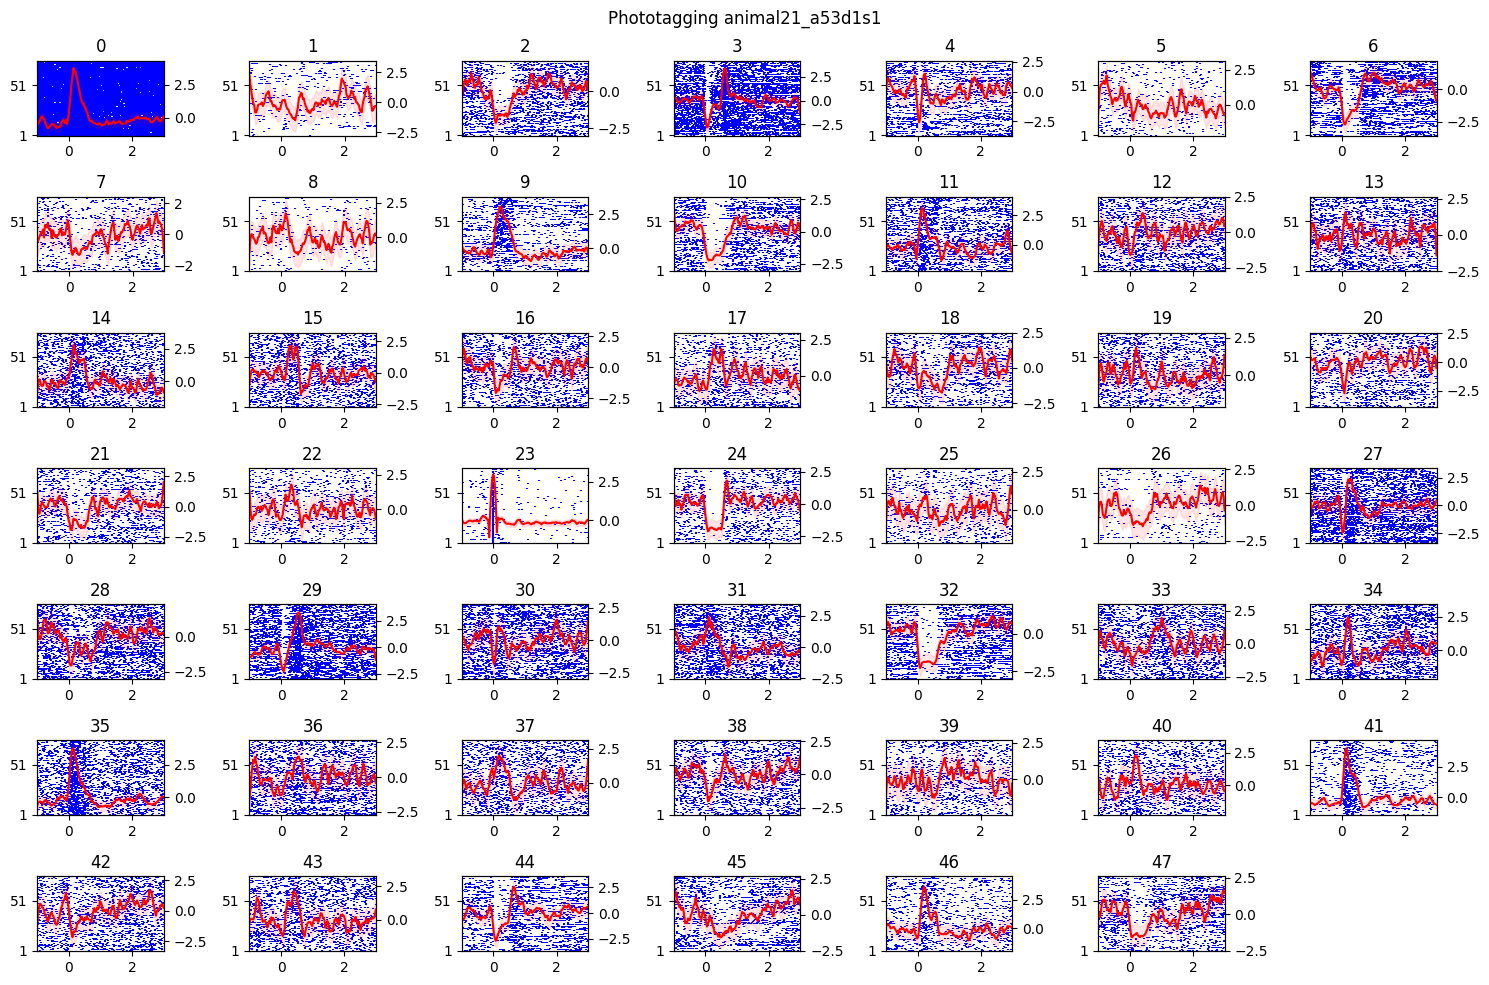

In [31]:
Raster_saving_folder = os.path.join(saving_folder, 'Raster')
os.makedirs(Raster_saving_folder, exist_ok=True)

plots(
    *[f"plotRaster(SpikeTimes, {unit}, show=False, xlabel=False, ylabel=False, title='{unit}', color='blue', psth=True, psthcolor='red', shadedcolor='red')" for unit in range(Nclust)],
    suptitle=f"Phototagging {exp_id}",
    save=Saving_boolean,
    filename=os.path.join(Raster_saving_folder, f"Raster_{exp_id}_phototagging.png"),
    size=(15,10)
)

In [32]:
All_raster_saving_folder = os.path.join(saving_folder, 'Raster', 'All')
os.makedirs(All_raster_saving_folder, exist_ok=True)

for unit in range(Nclust):
    plotRaster(SpikeTimes, unit,
               color='blue',
               psth=True, psthcolor='red', shadedcolor='red',
               xlabel=True, ylabel=True,
               title=f'Unit {unit}, {exp_id}',
               show=False,
               save=True,
               filename=os.path.join(All_raster_saving_folder, f"Raster_{exp_id}_phototagging_unit{unit}.png"))

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>PSTH Heatmap</strong></span>

In [33]:
# Zmaxiscore = [[] for _ in range(len(SpikeTimes['first']['CW']))]

# for unit in range(len(SpikeTimes['first']['CW'])):
#     StudiedSpikeTimes = SpikeTimes['first']['CW'][unit]

#     color='k'
#     shadedcolor='k'
#     ylabel=True
#     xlabel=True

#     local_trial_number = len(StudiedSpikeTimes)

#     binResolution=0.03

#     spike_number_per_trial = [[] for _ in range(local_trial_number)]
#     edges = []
#     unitary_firing_rate = [[] for _ in range(local_trial_number)]

#     for trial in range(local_trial_number):
#         spike_number_per_trial[trial], edges = np.histogram(StudiedSpikeTimes[trial], bins=np.arange(-timeBef, timeAft + binResolution, binResolution))

#     frequency_per_trial = [[spike_number_per_trial[trial][bin]/binResolution for bin in range(len(edges)-1)] for trial in range(local_trial_number)]
#     mean_frequency = [np.mean([frequency_per_trial[trial][bin] for trial in range(local_trial_number)]) for bin in range(len(edges)-1)]

#     Zscore = (mean_frequency - np.mean(mean_frequency)) / np.std(mean_frequency)
#     Zunitary = (frequency_per_trial - np.mean(mean_frequency)) / np.std(mean_frequency)
#     SEM = np.std(Zunitary)/np.sqrt(len(Zunitary))

#     # # plt.figure(figsize=(15,6))
#     # plt.plot(edges[:-1], Zscore, color=color)
#     # plt.fill_between(edges[:-1], Zscore-SEM, Zscore+SEM, alpha=0.1, color=shadedcolor)
#     # plt.xlim(-timeBef,timeAft)
#     # if ylabel:
#     #     plt.ylabel('PSTH')
#     # if xlabel:
#     #     plt.xlabel('Time (s)')
#     # plt.show()

#     Zmaxiscore[unit] = Zscore



# # del Zmaxiscore[22]


# # # Créer des données aléatoires pour le heatmap (une matrice 10x10)
# # data = np.random.rand(10, 100)

# # Afficher le heatmap
# plt.figure(figsize=(15, 5))
# plt.imshow(Zmaxiscore, cmap='coolwarm', interpolation='nearest', vmin=-2,vmax=2)
# plt.colorbar()  # Ajouter une barre de couleur pour référence
# # plt.xticks(duration)
# plt.show()

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Statistics</strong></span>

### <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Spike counting</strong></span>

In [34]:
numberBef, numberDur, diffBefDur, sumBefDur = ([[] for _ in range(Nclust)] for _ in range(4))


windowDur = [0, 0.003]
windowBef = [-0.004, -0.001]

for unit in range(Nclust):
    for trial in range(len(SpikeTimes[unit])):
        fooSpike = SpikeTimes[unit][trial]
        numberBef[unit].append(np.sum((fooSpike < windowBef[1]) & (fooSpike > windowBef[0])))
        numberDur[unit].append(np.sum((fooSpike < windowDur[1]) & (fooSpike > windowDur[0])))
        diffBefDur[unit].append(numberDur[unit][-1] - np.mean(numberBef[unit][-1]))
        sumBefDur[unit].append(numberDur[unit][-1] + np.mean(numberBef[unit][-1]))

### <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Paired Wilcoxon Test</strong></span>

In [35]:
statistics, p_values = ([[] for _ in range(Nclust)] for _ in range(2))


for unit in range(Nclust):
    try:
        results = wilcoxon(numberBef[unit], numberDur[unit])
        statistics[unit].append(results[0])
        p_values[unit].append(results[1])
    except ValueError:
        statistics[unit].append(0)
        p_values[unit].append(1)

c:\Users\gbouvier\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


### <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Determination of significant units by condition</strong></span>

In [36]:
p_value_threshold = 0.05

significance = []

significance = np.where([p_values[neuron][0]<p_value_threshold for neuron in range(Nclust)])[0]

### <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Visual Overview Of Spike Numbers Before & During</strong></span>

In [37]:
print(f"Mean number of spikes before the phototagging : {np.mean([np.mean(numberBef[unit]) for unit in range(Nclust)])}")
print(f"Mean number of spikes during the phototagging : {np.mean([np.mean(numberDur[unit]) for unit in range(Nclust)])}")

Mean number of spikes before the phototagging : 0.02333333333333333
Mean number of spikes during the phototagging : 0.11833333333333333


### <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Resuming Modulations</strong></span>

In [38]:
modulation = [[] for _ in range(Nclust)]

for unit in range(Nclust):
    modulation[unit] = 1 if unit in significance else 0

# Convert lists -> NumPy
modulation = np.array(modulation)

In [39]:
path_phototagged = os.path.join(saving_folder, 'Modulation')
path_nonphototagged = os.path.join(saving_folder, 'Modulation', 'Not_modulated')
os.makedirs(path_phototagged, exist_ok=True)
os.makedirs(path_nonphototagged, exist_ok=True)


for i in range(Nclust):
    plt.eventplot(SpikeTimes[i])
    plt.axvspan(-0.004, -0.001, color='gray', alpha=0.2)
    plt.axvspan(0, 0.003, color='cyan', alpha=0.2)
    plt.xlim(-0.005, 0.005)
    plt.margins(y=0)
    text_x = -0.004
    text_y = len(SpikeTimes[i]) + 5
    text = f'''stats = {statistics[i][0]:.2f}
    p = {p_values[i][0]:.5f}'''
    box_props = dict(boxstyle='round', facecolor='white', edgecolor='black')
    plt.text(text_x, text_y, text, bbox=box_props, ha='center', va='center')

    if i in significance:
        plt.title(f'Phototagged Unit {i}')
        if Saving_boolean:
            plt.savefig(os.path.join(path_phototagged, f"Unit_{i}_phototagged.png"))
        plt.close()
    else:
        plt.title(f'Not Phototagged Unit {i}')
        if Saving_boolean:
            plt.savefig(os.path.join(path_nonphototagged, f"Unit_{i}_not_phototagged.png"))
        plt.close()

### <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Showing Numerical Results</strong></span>

In [40]:
print(f"Significant phototagged units : {significance}")

Significant phototagged units : [ 0  2  3  5 11 12 14 19 23 25 35 39 40 42 45]


In [41]:
#labels_inner = ['Phototagged', 'Not phototagged']
#colors_inner = ['#032CA1', '#34A204']
#sizes_inner = [
#    np.sum([modulation['phototagging']]),
#    Nclust - np.sum([modulation['phototagging']])
#    ]
#
#
#if (np.array(sizes_inner)==0).any():
#    sizes_inner_copy = sizes_inner.copy()
#    sizes_inner = [size for size in sizes_inner_copy if size != 0]
#    labels_inner = [label for i, label in enumerate(labels_inner) if sizes_inner_copy[i] != 0]
#    colors_inner = [color for i, color in enumerate(colors_inner) if sizes_inner_copy[i] != 0]
#effectifs_inner = [Nclust for _ in range(len(sizes_inner))]
#explode_inner = [0.025 for _ in range(len(sizes_inner))]
#
#
#
#
#
#
#
#
#
#labels_middle = ['CW', 'CCW', 'CW & CCW', 'Not modulated', 'Not modulated', 'CW & CCW', 'CCW', 'CW']
#colors_middle = ['#4DB0EE', '#0084D7', '#0079C6', '#0069AC', '#3FD000', '#5CE520', '#75F03F', '#D4FFCB']
#sizes_middle = [
#    np.sum([modulation['phototagging'][i] == 1 and entry['selectivity'] == 'CW' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([modulation['phototagging'][i] == 1 and entry['selectivity'] == 'CCW' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([modulation['phototagging'][i] == 1 and entry['selectivity'] == 'both' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([modulation['phototagging'][i] == 1 and entry['selectivity'] == 'unmodulated' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([modulation['phototagging'][i] == 0 and entry['selectivity'] == 'unmodulated' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([modulation['phototagging'][i] == 0 and entry['selectivity'] == 'both' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([modulation['phototagging'][i] == 0 and entry['selectivity'] == 'CCW' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([modulation['phototagging'][i] == 0 and entry['selectivity'] == 'CW' for i, entry in enumerate(modulation['rotation'])]),
#    ]
#
#
#if (np.array(sizes_middle)==0).any():
#    sizes_middle_copy = sizes_middle.copy()
#    sizes_middle = [size for size in sizes_middle_copy if size != 0]
#    labels_middle = [label for i, label in enumerate(labels_middle) if sizes_middle_copy[i] != 0]
#    colors_middle = [color for i, color in enumerate(colors_middle) if sizes_middle_copy[i] != 0]
#effectifs_middle = [Nclust for _ in range(len(sizes_middle))]
#explode_middle = [0.15 for _ in range(len(sizes_middle))]
#
#
#
#
#
#
#
#
#labels_outer = ['+', '-', '+', '-', '+/+', '-/-', '+/-', '-/+', '', '', '-/+', '+/-', '-/-', '+/+', '-', '+', '-', '+']
#colors_outer = ['#4DB0EE80', '#4DB0EE80', '#0084D780', '#0084D780', '#0079C680', '#0079C680', '#0079C680', '#0079C680', '#0069AC80', '#3FD00080', '#5CE52080', '#5CE52080', '#5CE52080', '#5CE52080', '#75F03F80', '#75F03F80', '#D4FFCB80', '#D4FFCB80']
#sizes_outer = [
#    np.sum([entry['type'] == '+' and modulation['phototagging'][i] == 1 and entry['selectivity'] == 'CW' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '-' and modulation['phototagging'][i] == 1 and entry['selectivity'] == 'CW' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '+' and modulation['phototagging'][i] == 1 and entry['selectivity'] == 'CCW' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '-' and modulation['phototagging'][i] == 1 and entry['selectivity'] == 'CCW' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '+/+' and modulation['phototagging'][i] == 1 and entry['selectivity'] == 'both' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '-/-' and modulation['phototagging'][i] == 1 and entry['selectivity'] == 'both' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '+/-' and modulation['phototagging'][i] == 1 and entry['selectivity'] == 'both' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '-/+' and modulation['phototagging'][i] == 1 and entry['selectivity'] == 'both' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([modulation['phototagging'][i] == 1 and entry['selectivity'] == 'unmodulated' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([modulation['phototagging'][i] == 0 and entry['selectivity'] == 'unmodulated' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '-/+' and modulation['phototagging'][i] == 0 and entry['selectivity'] == 'both' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '+/-' and modulation['phototagging'][i] == 0 and entry['selectivity'] == 'both' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '-/-' and modulation['phototagging'][i] == 0 and entry['selectivity'] == 'both' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '+/+' and modulation['phototagging'][i] == 0 and entry['selectivity'] == 'both' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '-' and modulation['phototagging'][i] == 0 and entry['selectivity'] == 'CCW' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '+' and modulation['phototagging'][i] == 0 and entry['selectivity'] == 'CCW' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '-' and modulation['phototagging'][i] == 0 and entry['selectivity'] == 'CW' for i, entry in enumerate(modulation['rotation'])]),
#    np.sum([entry['type'] == '+' and modulation['phototagging'][i] == 0 and entry['selectivity'] == 'CW' for i, entry in enumerate(modulation['rotation'])]),
#    ]
#
#
#if (np.array(sizes_outer)==0).any():
#    sizes_outer_copy = sizes_outer.copy()
#    sizes_outer = [size for size in sizes_outer_copy if size != 0]
#    labels_outer = [label for i, label in enumerate(labels_outer) if sizes_outer_copy[i] != 0]
#    colors_outer = [color for i, color in enumerate(colors_outer) if sizes_outer_copy[i] != 0]
#effectifs_outer = [Nclust for _ in range(len(sizes_outer))]
#explode_outer = [0.25 for _ in range(len(sizes_outer))]
#
#
#
#
#
#
#
#def autopct_format(pct, sizes):
#    total = sum(sizes)
#    val = int(round(pct*total/100.0))
#    return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
#
#
#
#fig, ax = plt.subplots(figsize=(10, 10))
#wedges, _, _ = ax.pie(sizes_outer, labels=labels_outer, textprops={'fontsize': 9}, radius=3, autopct=lambda pct: autopct_format(pct, sizes_outer), startangle=0, colors=colors_outer, pctdistance=0.85, shadow=False, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
#for i, index in enumerate(labels_outer):
#    if index == '':
#        wedges[i].set_visible(False)
#middle = ax.pie(sizes_middle, labels=labels_middle, textprops={'fontsize': 9}, radius=2, autopct='%1.1f%%', startangle=0, colors=colors_middle, labeldistance=0.75, pctdistance=0.6, shadow=True)
#inner = ax.pie(sizes_inner, labels=None, autopct='%1.1f%%', textprops={'fontsize': 9}, radius=1, startangle=0, colors=colors_inner, pctdistance=0.35)
#centre_cercle = plt.Circle((0, 0), 0.6, color='white')
#ax.add_artist(centre_cercle)
#plt.suptitle(f"Phototagging and rotation modulation {exp_id}")
#
#legend_labels = labels_inner
#legend_colors = colors_inner
#
#plt.legend(inner[0], legend_labels, loc='center left', bbox_to_anchor=(0.8, 0.05))
#
#plt.axis('equal')
#
#if Saving_boolean:
#    path = os.path.join(saving_folder, 'Distribution', exp_id)
#    os.makedirs(path, exist_ok=True)
#    plt.savefig(os.path.join(path, f"Phototagging_Distribution_{exp_id}.png"))
#plt.show()

In [42]:
#labels_inner = ['CW', 'CCW', 'CW & CCW', 'Not modulated']
#colors_inner = ['#4DB0EE', '#0084D7', '#0079C6', 'gainsboro']
#sizes_inner = [
#    np.sum([entry['selectivity'] == 'CW' for entry in modulation['rotation']]),
#    np.sum([entry['selectivity'] == 'CCW' for entry in modulation['rotation']]),
#    np.sum([entry['selectivity'] == 'both' for entry in modulation['rotation']]),
#    np.sum([entry['selectivity'] == 'unmodulated' for entry in modulation['rotation']])
#    ]
#
#
#if (np.array(sizes_inner)==0).any():
#    sizes_inner_copy = sizes_inner.copy()
#    sizes_inner = [size for size in sizes_inner_copy if size != 0]
#    labels_inner = [label for i, label in enumerate(labels_inner) if sizes_inner_copy[i] != 0]
#    colors_inner = [color for i, color in enumerate(colors_inner) if sizes_inner_copy[i] != 0]
#effectifs_inner = [Nclust for _ in range(len(sizes_inner))]
#
#
#labels_outer = ['+', '-', '+', '-', '+/+', '-/-', '+/-', '-/+', '']
#colors_outer = ['#4DB0EE80', '#4DB0EE80', '#0084D780', '#0084D780', '#0079C699', '#0079C699', '#0079C699', '#0079C699', 'gainsboro']
#sizes_outer = [
#    np.sum([entry['type'] == '+' and entry['selectivity'] == 'CW' for entry in modulation['rotation']]),
#    np.sum([entry['type'] == '-' and entry['selectivity'] == 'CW' for entry in modulation['rotation']]),
#    np.sum([entry['type'] == '+' and entry['selectivity'] == 'CCW' for entry in modulation['rotation']]),
#    np.sum([entry['type'] == '-' and entry['selectivity'] == 'CCW' for entry in modulation['rotation']]),
#    np.sum([entry['type'] == '+/+' and entry['selectivity'] == 'both' for entry in modulation['rotation']]),
#    np.sum([entry['type'] == '-/-' and entry['selectivity'] == 'both' for entry in modulation['rotation']]),
#    np.sum([entry['type'] == '+/-' and entry['selectivity'] == 'both' for entry in modulation['rotation']]),
#    np.sum([entry['type'] == '-/+' and entry['selectivity'] == 'both' for entry in modulation['rotation']]),
#    np.sum([entry['selectivity'] == 'unmodulated' for entry in modulation['rotation']])
#    ]
#
#
#if (np.array(sizes_outer)==0).any():
#    sizes_outer_copy = sizes_outer.copy()
#    sizes_outer = [size for size in sizes_outer_copy if size != 0]
#    labels_outer = [label for i, label in enumerate(labels_outer) if sizes_outer_copy[i] != 0]
#    colors_outer = [color for i, color in enumerate(colors_outer) if sizes_outer_copy[i] != 0]
#effectifs_outer = [Nclust for _ in range(len(sizes_outer))]
#
#
#def autopct_format(pct, sizes):
#    total = sum(sizes)
#    val = int(round(pct*total/100.0))
#    return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
#
#
#fig, ax = plt.subplots(figsize=(10, 10))
#wedges, _, _ = ax.pie(sizes_outer, labels=labels_outer, radius=3, autopct=lambda pct: autopct_format(pct, sizes_outer), startangle=0, colors=colors_outer, pctdistance=0.8, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
#wedges[labels_outer.index('')].set_visible(False)
#ax.pie(sizes_inner, labels=labels_inner, radius=2, autopct='%1.1f%%', startangle=0, colors=colors_inner, shadow=True, labeldistance=0.65, pctdistance=0.45)
#plt.suptitle(f"Rotation modulation {exp_id}")
#centre_cercle = plt.Circle((0, 0), 0.6, color='white')
#ax.add_artist(centre_cercle)
#plt.axis('equal')
#
#if Saving_boolean:
#    path = os.path.join(saving_folder, 'Distribution', exp_id)
#    os.makedirs(path, exist_ok=True)
#    plt.savefig(os.path.join(path, f"Distribution_{exp_id}.png"))
#plt.show()

# <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Saving Variables</strong></span>

In [43]:
if Saving_boolean:
    phototagging_data = {
        'informative_data': {
            'exp_id': exp_id,
            'timeBef': timeBef,
            'timeAft': timeAft,
            'refValue': refValue,
            'din': din,
            'time': time,
            'chanSpace': chanSpace,
            'rotationSpeed': rotationSpeed,
            'ProbeType': ProbeType,
            # 'f': f,
            'ML_pos': ML_pos,
            'AP_pos': AP_pos
            },
        'Spiking_times': {
            'SpikeTimesMUA': SpikeTimesMUA,
            'Ntrial': Ntrial,
            'protocolSeparationIndex': limit,
            'SpikeTimes': SpikeTimes
        },
        'Rotation_data': {
            'ref': ref,
            'peaks': peaks,
            'duration': duration,
            'table_velocity': table_velocity
        },
        'SUA_data': {
            'c_class': c_class,
            'Nclust': Nclust
        },
        'MUA_data': {
            'm_class': m_class,
            'm_class_tet': m_class_tet,
            'Nclust_mua': Nclust_mua,
            'Ntet': Ntet,
            'allBasem': allBasem,
            'PkDepthUnit': PkDepthUnit,
            'mapp': mapp,
            'ArgallLayers': ArgallLayers,
            'DepthTetrode': DepthTetrode,
            'AllDepth': AllDepth
        },
        'Statistics_data': {
            'windowBef': windowBef,
            'windowDur': windowDur,
            'numberBef': numberBef,
            'numberDur': numberDur,
            'diffBefDur': diffBefDur,
            'sumBefDur': sumBefDur,
            'statistics': statistics,
            'p_values': p_values,
            'significance': significance,
            'modulation': modulation
        }
    }



    file = os.path.join(saving_folder, exp_id+"_phototagging_variables.pickle")
    
    # from tqdm import tqdm
    # with tqdm(total=100) as pbar:
    #     jd.save(data, os.path.join(saving_folder, exp_id+"_data.json"), progress=lambda *args: pbar.update(100))
    # jd.save(data, os.path.join(data_saving_folder, exp_id+"_data.json"))
        
    # Sauvegarde des variables dans un fichier
    with open(file, 'wb') as FILE_WRITTER:
        pickle.dump(phototagging_data, FILE_WRITTER)
        FILE_WRITTER.close()